In [9]:
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


TO DO
1. scale images
2. shape of images to be same
3. Create batch of fixed shape of images and corresponding labels
4. Cast to float(if not already)

##using tf.data.Dataset.from_tensor_slices()

Example 1.

In [10]:
# using tf.data.Dataset.from_tensor_slices()

array =[1,3,4,2,34,51,3]
dataset = tf.data.Dataset.from_tensor_slices(array)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

dataset is of type TensorSliceDataset in which entry is in tensors

In [22]:
print(type(dataset))
print(len(dataset))

<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>
7


In [13]:
for data in dataset:
  print(data)
print("\n")
for data in dataset:
  print(data.numpy())

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(51, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


1
3
4
2
34
51
3


Example 2.

In [17]:
# lets say X is 1d and y is 1d as in case of Linear regression in one variable

X_train=[23,4,32,14,5,224,52]
y_train=[1,34,221,43,113,413,31]


X_test=[13,23]
y_test=[32,76]

train_dataset =tf.data.Dataset.from_tensor_slices((X_train,y_train))


In [18]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [19]:
print(len(train_dataset))

7


In [20]:
for input,output in train_dataset:
  print(input ,output)

tf.Tensor(23, shape=(), dtype=int32) tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(32, shape=(), dtype=int32) tf.Tensor(221, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32) tf.Tensor(43, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(113, shape=(), dtype=int32)
tf.Tensor(224, shape=(), dtype=int32) tf.Tensor(413, shape=(), dtype=int32)
tf.Tensor(52, shape=(), dtype=int32) tf.Tensor(31, shape=(), dtype=int32)


In [21]:
for input,output in train_dataset:
  print(input.numpy() ,output.numpy())

23 1
4 34
32 221
14 43
5 113
224 413
52 31


3.

In [32]:
X=[[2,3],[4,5],[13,43],[3421,21],[123,2]]
y=[0,1,1,0,1]

dataset = tf.data.Dataset.from_tensor_slices((X,y))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [37]:
for input ,label in dataset:
  print(input.numpy(),label.numpy())
# since not using shuffle, hence the order of this will remain the same

[2 3] 0
[4 5] 1
[13 43] 1
[3421   21] 0
[123   2] 1


In [34]:
for input,label in dataset.take(1):
  print(input.numpy(),label.numpy())

[2 3] 0


**Since not using shuffle, hence this take(1) gives same output everytime**

In [41]:
X=[[2,3],[4,5],[13,43],[3421,21],[123,2]]
y=[0,1,1,0,1]

dataset = tf.data.Dataset.from_tensor_slices((X,y))
dataset= dataset.shuffle(buffer_size=5)
dataset

<_ShuffleDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [42]:
for input ,label in dataset:
  print(input.numpy(),label.numpy())

[2 3] 0
[123   2] 1
[13 43] 1
[3421   21] 0
[4 5] 1


In [43]:
for input,label in dataset.take(1):
  print(input.numpy(),label.numpy())

[4 5] 1


## .map function

1.

In [48]:
X=[1,3,4,2,23]
dataset = tf.data.Dataset.from_tensor_slices(X)
# X=tf.constant(X)

def add_2(num):
  return num+2

dataset=dataset.map(add_2)
print(dataset)


<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


In [49]:
for data in dataset:
  print(data)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)


2.

Similar to case   when we have images in list/np array whatever and we need to normalise it ,we can use .map function

In [54]:
X=[ np.array([[2,3],[7,2]]) ,np.array([[2,3],[8,10]]),np.array([[1,5],[6,9]]) ,np.array([[4,8],[7,2]]) ]
y=[2,3,4,1]
print(X[0].shape)

dataset = tf.data.Dataset.from_tensor_slices((X,y))
print(dataset)


(2, 2)
<_TensorSliceDataset element_spec=(TensorSpec(shape=(2, 2), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


In [57]:
def scaling(image,label):
  return tf.cast(image ,tf.float32)/10.,label

dataset = dataset.map(scaling)


In [60]:
print(len(dataset))

4


In [62]:
for images ,labels in dataset:
  print(images.numpy() , labels.numpy())

[[0.2 0.3]
 [0.7 0.2]] 2
[[0.2 0.3]
 [0.8 1. ]] 3
[[0.1 0.5]
 [0.6 0.9]] 4
[[0.4 0.8]
 [0.7 0.2]] 1


## Creating Complete input pipeline

In [63]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [64]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

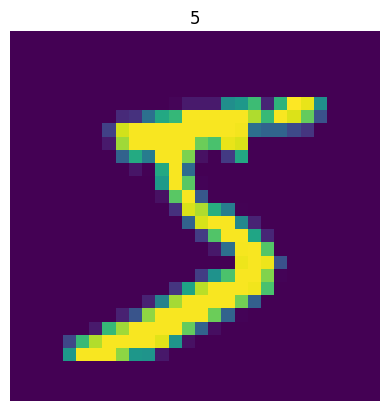

In [72]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.axis("off")

In [79]:
X_train[0].shape

(28, 28)

In [76]:
print(tf.reduce_max(X_train[0]))
print(tf.reduce_min(X_train[0]))

tf.Tensor(255, shape=(), dtype=uint8)
tf.Tensor(0, shape=(), dtype=uint8)


In [77]:
example_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
example_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [80]:
print("Len of dataset",len(example_dataset))

Len of dataset 60000


In [87]:
for images,labels in example_dataset.take(1):
  print(images.numpy(),labels.shape)
  break

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [88]:
def normalize_img(image ,label):
  return (tf.cast(image,tf.float32)/255.0 ,label )

In [90]:
example_dataset = example_dataset.map(normalize_img)
example_dataset

<_MapDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [91]:
print(len(example_dataset))

60000


In [92]:
for image,label in example_dataset.take(1):
  print(image.numpy(),label.numpy())

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.

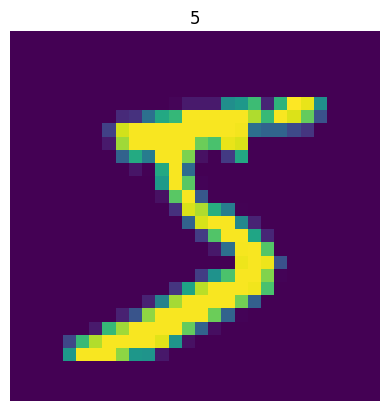

In [94]:
for image,label in example_dataset.take(1):
  plt.imshow(image.numpy())
  plt.title(label.numpy())
  plt.axis("off")

The above image will remain same ,since we are not doing shuffling hence always pichs the first element tuple of example_dataset

In [95]:
example_dataset = example_dataset.shuffle(buffer_size=10000)
example_dataset

<_ShuffleDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

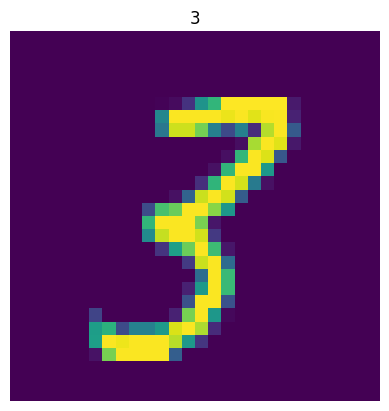

In [101]:
for image,label in example_dataset.take(1):
  plt.imshow(image.numpy())
  plt.title(label.numpy())
  plt.axis("off")

 without caching, the mapping operation (or any other dataset transformation like .map(), .shuffle(), .batch()) will be applied every time you iterate over the dataset.

When you use .cache(), the dataset transformation results (e.g., the output of the .map() operation) are cached after the first iteration:

In [102]:
example_dataset

<_ShuffleDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [103]:
example_dataset = example_dataset.cache()
example_dataset

<CacheDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

Shuffling

In [105]:
example_dataset = example_dataset.shuffle(len(example_dataset))

for (img, label) in example_dataset:
  print(img.numpy().shape, label.numpy())
  break

(28, 28) 9


Batching

In [106]:
print("Before batching")
example_dataset

Before batching


<_ShuffleDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [107]:
example_dataset = example_dataset.batch(32)
print("After")
example_dataset

After


<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

Here None is 32

How one batch looks like

In [108]:
for image,label in example_dataset.take(1):
  print(image.numpy().shape,label.numpy().shape)

(32, 28, 28) (32,)


In [110]:
for image,label in example_dataset.take(1):
  print(image.numpy().shape,label.numpy())

(32, 28, 28) [7 3 0 7 9 7 2 9 3 4 7 3 0 0 4 4 3 6 6 3 4 4 7 3 3 2 6 5 5 7 5 5]


he .prefetch(tf.data.AUTOTUNE) function in TensorFlow is used to optimize the input data pipeline by preloading data for the next step (e.g., training) while the current step is still being executed. This ensures that the data loading and preprocessing don't become a bottleneck during training or inference.

It allows the model to process one batch while the next batch is being prepared in the background.

This overlapping helps utilize both the CPU (for data loading and preprocessing) and the GPU/TPU (for model training) more effectively.

In [111]:
example_dataset = example_dataset.prefetch(tf.data.AUTOTUNE)

example_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

## FINAL PIPELINE (Summing up everything)

In [112]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(normalize_img)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(len(train_dataset))
train_dataset = train_dataset.batch(64)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)


In [113]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

(64, 28, 28)
(32,)


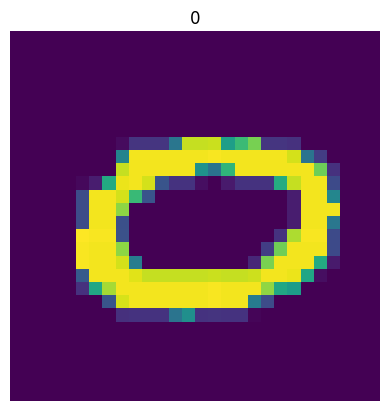

In [122]:
for images ,labels in train_dataset.take(1):
  print(images.shape)
  print(label.shape)
  plt.imshow(images[0])
  plt.title(labels[0].numpy())
  plt.axis("off")

In [123]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(normalize_img)
test_dataset = test_dataset.cache()

test_dataset = test_dataset.batch(64)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

Now simply create model
ans do

model.fit(train_dataset)